### Product and Retail Data Analysis
https://www.kaggle.com/carrie1/ecommerce-data/downloads/ecommerce-data.zip/1

#### About out Data
- Company - UK-based and registered non-store online retail
- Products for selling - Mainly all-occasion gifts
- Customers - Most are wholesalers (local or international)
- Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year)

In [68]:
# Import our modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

%matplotlib inline
# Using ggplot's style
plt.style.use('ggplot')

In [69]:

#import missingno as msno # missing data visualization module for Python
#import pandas_profiling
#import gc
#import datetime


In [70]:
# Loading our data
df1 = pd.read_csv("data/ecommerce_data1.csv", encoding = 'ISO-8859-1')
df2 = pd.read_csv("data/ecommerce_data2.csv", encoding = 'ISO-8859-1')

df = pd.concat([df1,df2])


In [71]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 270954
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [73]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [74]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [75]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [76]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/2010 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/2010 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/2010 14:32,0.43,NaN,United Kingdom


In [77]:
# change the invoice_date format - String to Timestamp format
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [78]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [79]:
# df_new without missing values
df_new = df.dropna()

In [80]:
# check missing values for each column 
df_new.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [81]:
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [82]:
df_new.CustomerID = pd.to_numeric(df_new.CustomerID, errors="coerce", downcast= "integer")
df_new.CustomerID = df_new.CustomerID.astype("object")

In [83]:
df_new.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [84]:
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [85]:
# Rename the dataframe to make code more readable
df2 = df_new.copy()

In [86]:
df2.describe().round(2)

,Quantity,InvoiceDate,UnitPrice
count,406829.00,406829,406829.00
mean,12.06,2011-07-10 16:30:57.879207424,3.46
min,-80995.00,2010-12-01 08:26:00,0.00
25%,2.00,2011-04-06 15:02:00,1.25
50%,5.00,2011-07-31 11:48:00,1.95
75%,12.00,2011-10-20 13:06:00,3.75
max,80995.00,2011-12-09 12:50:00,38970.00
std,248.69,NaN,69.32


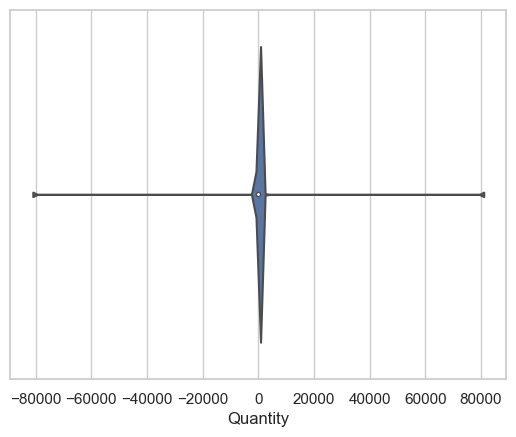

In [87]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=df2["Quantity"])

In [88]:
df2.query("Quantity < 0")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
269495,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
270587,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
270761,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
270762,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [89]:
# remove negative quanitites

df2 = df2[df2.Quantity > 0]
df2.describe().round(2)

,Quantity,InvoiceDate,UnitPrice
count,397924.00,397924,397924.00
mean,13.02,2011-07-10 23:43:36.912475648,3.12
min,1.00,2010-12-01 08:26:00,0.00
25%,2.00,2011-04-07 11:12:00,1.25
50%,6.00,2011-07-31 14:39:00,1.95
75%,12.00,2011-10-20 14:33:00,3.75
max,80995.00,2011-12-09 12:50:00,8142.75
std,180.42,NaN,22.10


In [90]:
#We verify products that have a unit price equal to 0.00
df2.query("UnitPrice == 0.00").head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom


In [91]:
# We verify products with "Quantity" greater than 10,000
df2.query("Quantity > 10000")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
231168,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256,United Kingdom
269467,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


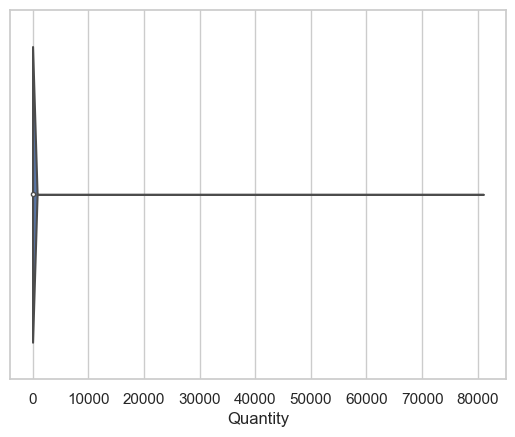

In [92]:
ax = sns.violinplot(x=df2["Quantity"])

In [93]:
# We add the column "Amount spent"
df2['AmountSpent'] = df2['Quantity'] * df2['UnitPrice']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [94]:
# Let's add Month, year, quarter 
df2['month'] = df2['InvoiceDate'].dt.month
df2['year'] = df2['InvoiceDate'].dt.year
df2['dayofweek'] = df2['InvoiceDate'].dt.dayofweek
df2['quarter'] = df2['InvoiceDate'].dt.quarter
df2['weekofyear'] = df2['InvoiceDate'].dt.isocalendar().week
df2['dayofweek'] = df2['dayofweek'] + 1
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month,year,dayofweek,quarter,weekofyear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2010,3,4,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,3,4,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,2010,3,4,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,3,4,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,3,4,48


In [95]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 270954
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  object        
 7   Country      397924 non-null  object        
 8   AmountSpent  397924 non-null  float64       
 9   month        397924 non-null  int32         
 10  year         397924 non-null  int32         
 11  dayofweek    397924 non-null  int32         
 12  quarter      397924 non-null  int32         
 13  weekofyear   397924 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(2), int32(4), int64(1), object(5)
memory usage: 

## Exploring and Analysing the Data

In [96]:
# Consolidating the number of Sales Made per customer for each country
# We use InvoiceNo as the count for sales
sales_per_cust = df2.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False)
sales_per_cust.columns = ['CustomerID', 'Country', "NumberOfSales"]
sales_per_cust

,CustomerID,Country,NumberOfSales
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700
...,...,...,...
605,13135,United Kingdom,1
643,13185,United Kingdom,1
3969,17763,United Kingdom,1
3962,17752,United Kingdom,1


In [97]:
# We can see that there are clients who have purchased from different countries
sales_per_cust.CustomerID.value_counts()

CustomerID
12417    2
12457    2
12370    2
12455    2
12422    2
        ..
14407    1
12349    1
14396    1
17183    1
12346    1
Name: count, Length: 4339, dtype: int64

In [98]:
sales_per_cust.query("CustomerID == 12417")

,CustomerID,Country,NumberOfSales
58,12417,Belgium,169
59,12417,Spain,23


In [99]:
orders_by_customer = df2.groupby(by='CustomerID', as_index=False).agg(orders=("InvoiceNo", "count"))
orders_by_customer 

,CustomerID,orders
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17
...,...,...
4334,18280,10
4335,18281,7
4336,18282,12
4337,18283,756


## Let's see who are the 15 clients with the most orders

In [100]:
orders_by_customer = df2.groupby(by='CustomerID', as_index=False).agg(orders=("InvoiceNo", "count"))
orders_by_customer = orders_by_customer.merge(df2[['CustomerID', 'Country']].drop_duplicates(), on='CustomerID', how="left").sort_values("orders", ascending=False)
orders_by_customer

,CustomerID,orders,Country
4019,17841,7847,United Kingdom
1888,14911,5677,EIRE
1298,14096,5111,United Kingdom
334,12748,4596,United Kingdom
1670,14606,2700,United Kingdom
...,...,...,...
2451,15668,1,United Kingdom
2442,15657,1,United Kingdom
3416,16990,1,United Kingdom
1742,14705,1,United Kingdom


In [101]:
orders_by_customer_top15 = orders_by_customer.head(15)
orders_by_customer_top15.CustomerID = orders_by_customer_top15.CustomerID.astype("object")
orders_by_customer_top15

,CustomerID,orders,Country
4019,17841,7847,United Kingdom
1888,14911,5677,EIRE
1298,14096,5111,United Kingdom
334,12748,4596,United Kingdom
1670,14606,2700,United Kingdom
2185,15311,2379,United Kingdom
1698,14646,2080,Netherlands
570,13089,1818,United Kingdom
699,13263,1677,United Kingdom
1443,14298,1637,United Kingdom


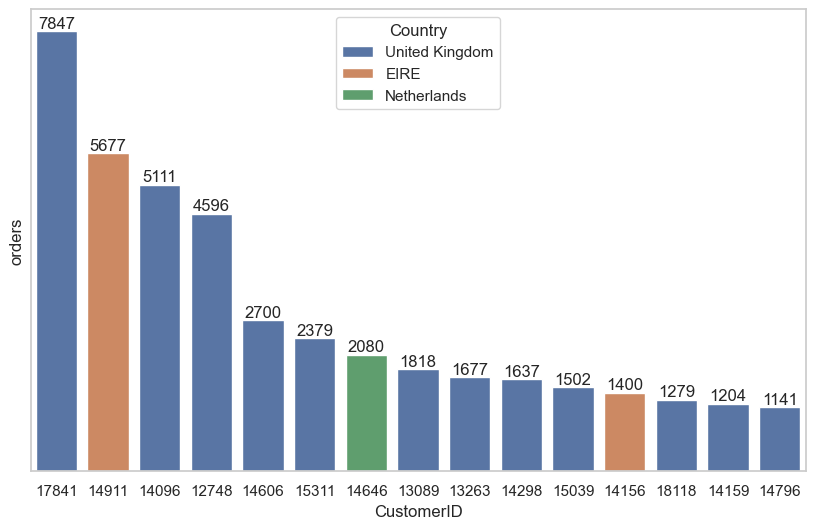

In [102]:
plt.figure(figsize=(10,6))
sns.barplot(data=orders_by_customer_top15, x='CustomerID', y='orders', order=orders_by_customer_top15['CustomerID'], hue='Country', dodge=False)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')

plt.legend(title='Country')  # Mostrar leyenda con los colores asignados a cada país/continente
plt.yticks([], [])
plt.show()

## Let's see who are the 15 clients with the most spending

In [103]:
spent_by_customer_top15 = df2.groupby(by='CustomerID', as_index=False)['AmountSpent'].sum().sort_values(by='AmountSpent', ascending=False)
spent_by_customer_top15 = spent_by_customer_top15.merge(df2[['CustomerID', 'Country']].drop_duplicates(), on='CustomerID', how="left")
spent_by_customer_top15 = spent_by_customer_top15.head(15)
spent_by_customer_top15

,CustomerID,AmountSpent,Country
0,14646,280206.02,Netherlands
1,18102,259657.30,United Kingdom
2,17450,194550.79,United Kingdom
3,16446,168472.50,United Kingdom
4,14911,143825.06,EIRE
5,12415,124914.53,Australia
6,14156,117379.63,EIRE
7,17511,91062.38,United Kingdom
8,16029,81024.84,United Kingdom
9,12346,77183.60,United Kingdom


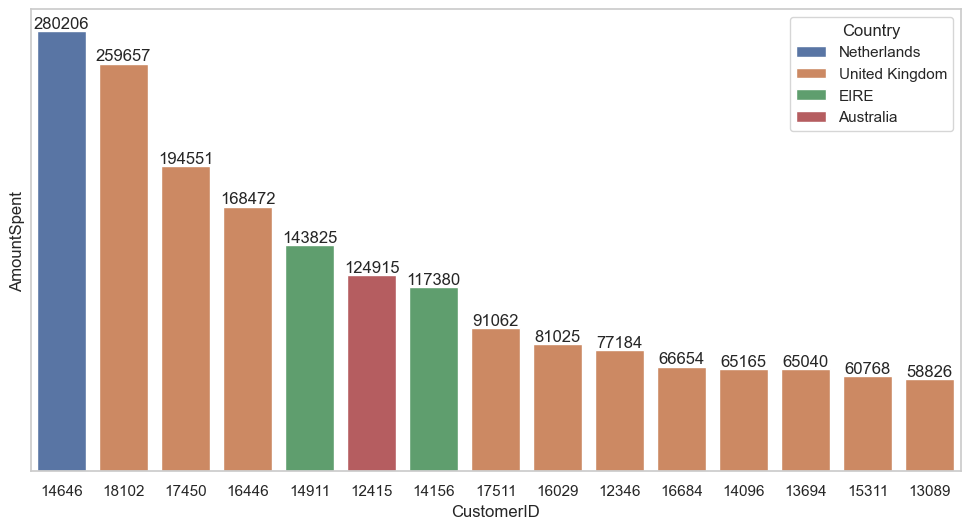

In [104]:
plt.figure(figsize=(12,6))
sns.barplot(data=spent_by_customer_top15, x='CustomerID', y='AmountSpent', order=spent_by_customer_top15['CustomerID'], hue="Country", dodge=False)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')

plt.yticks([], []) 
plt.show()

# Purchasing Patterns
https://www.kaggle.com/hendraherviawan/customer-purchasing-patterns

In [105]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month,year,dayofweek,quarter,weekofyear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2010,3,4,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,3,4,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,2010,3,4,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,3,4,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,3,4,48


In [106]:
# Insert a new column year_month
df2.insert(loc=2, column='year_month', value=df2['InvoiceDate'].map(lambda x: 100*x.year + x.month))

# Insert a new column hour
df2.insert(loc=5, column='hour', value=df2.InvoiceDate.dt.hour)

In [107]:
# Check to see if our year_month and hour columns were made
df2.head()

,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month,year,dayofweek,quarter,weekofyear
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,8,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2010,3,4,48
1,536365,71053,201012,WHITE METAL LANTERN,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,3,4,48
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,2010,3,4,48
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,3,4,48
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,3,4,48


## Let's see the total orders per month

In [108]:
orders_by_month = df2.groupby('InvoiceNo')['month'].first().value_counts().sort_index().to_frame().reset_index()
orders_by_month

,month,count
0,1,987
1,2,998
2,3,1321
3,4,1149
4,5,1555
5,6,1393
6,7,1331
7,8,1281
8,9,1756
9,10,1929


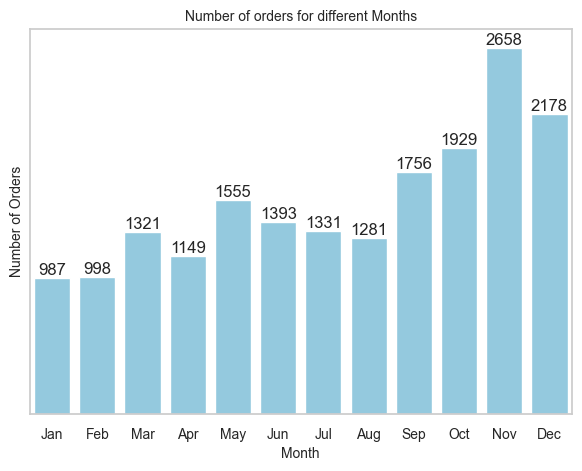

In [109]:
plt.figure(figsize=(7,5))
ax = sns.barplot(data=orders_by_month, y='count', x="month", color='skyblue')
ax.set_xlabel('Month',fontsize=10)
ax.set_ylabel('Number of Orders',fontsize=10)
ax.set_title('Number of orders for different Months',fontsize=10)
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), rotation='horizontal', fontsize=10)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')

plt.yticks([], []) 
plt.show()

## Let's see the total orders by day of the week.

In [110]:
orders_by_dayofweek = df2.groupby('InvoiceNo')['dayofweek'].first().value_counts().sort_index().to_frame().reset_index()
orders_by_dayofweek

,dayofweek,count
0,1,2863
1,2,3185
2,3,3455
3,4,4033
4,5,2831
5,7,2169


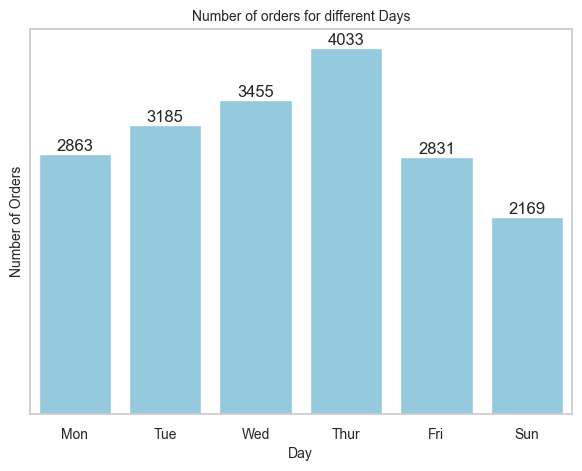

In [111]:
plt.figure(figsize=(7,5))
ax = sns.barplot(data=orders_by_dayofweek, y='count', x="dayofweek", color='skyblue')
ax.set_xlabel('Day',fontsize=10)
ax.set_ylabel('Number of Orders',fontsize=10)
ax.set_title('Number of orders for different Days',fontsize=10)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=10)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')

plt.yticks([], []) 
plt.show()

## Let's see the total orders per hour

In [112]:
orders_by_hour = df2.groupby('InvoiceNo')['hour'].first().value_counts().sort_index().to_frame().reset_index()
orders_by_hour

,hour,count
0,6,1
1,7,29
2,8,555
3,9,1394
4,10,2226
5,11,2277
6,12,3129
7,13,2637
8,14,2275
9,15,2038


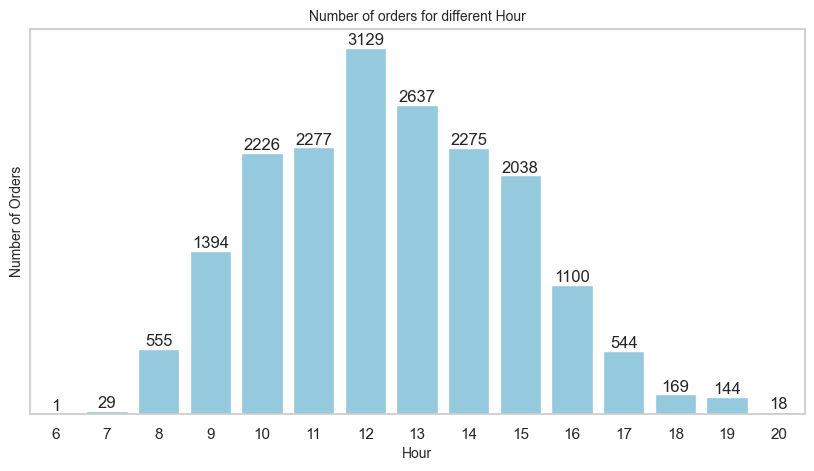

In [113]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=orders_by_hour, y='count', x="hour", color='skyblue')
ax.set_xlabel('Hour',fontsize=10)
ax.set_ylabel('Number of Orders',fontsize=10)
ax.set_title('Number of orders for different Hour',fontsize=10)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')

plt.yticks([], []) 
plt.show()

### Analyze Unit Prices of our items

In [114]:
df2.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

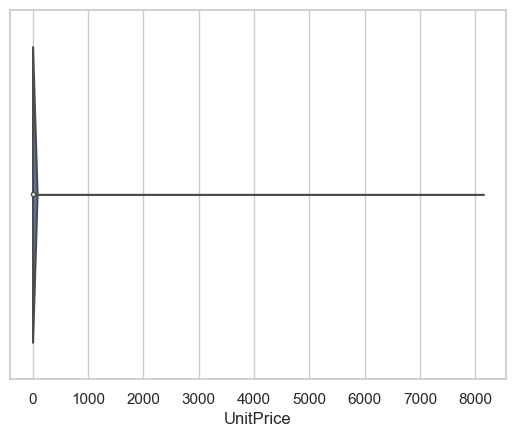

In [115]:
ax = sns.violinplot(x=df2["UnitPrice"])

In [116]:
# What are the free items
df_free = df2[df2.UnitPrice == 0]
print(len(df_free))
df_free.head()

40


,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month,year,dayofweek,quarter,weekofyear
9302,537197,22841,201012,ROUND CAKE TIN VINTAGE GREEN,1,14,2010-12-05 14:02:00,0.0,12647,Germany,0.0,12,2010,7,4,48
33576,539263,22580,201012,ADVENT CALENDAR GINGHAM SACK,4,14,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0,12,2010,4,4,50
40089,539722,22423,201012,REGENCY CAKESTAND 3 TIER,10,13,2010-12-21 13:45:00,0.0,14911,EIRE,0.0,12,2010,2,4,51
47068,540372,22090,201101,PAPER BUNTING RETROSPOT,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,1,2011,4,1,1
47070,540372,22553,201101,PLASTERS IN TIN SKULLS,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,1,2011,4,1,1


In [117]:
# See when these free items were given out
df_free.year_month.value_counts().sort_index()

year_month
201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: count, dtype: int64

In [118]:
orders_by_year_month = df2.groupby('InvoiceNo')['year_month'].first().value_counts().sort_index().to_frame().reset_index()
orders_by_year_month

,year_month,count
0,201012,1400
1,201101,987
2,201102,998
3,201103,1321
4,201104,1149
5,201105,1555
6,201106,1393
7,201107,1331
8,201108,1281
9,201109,1756


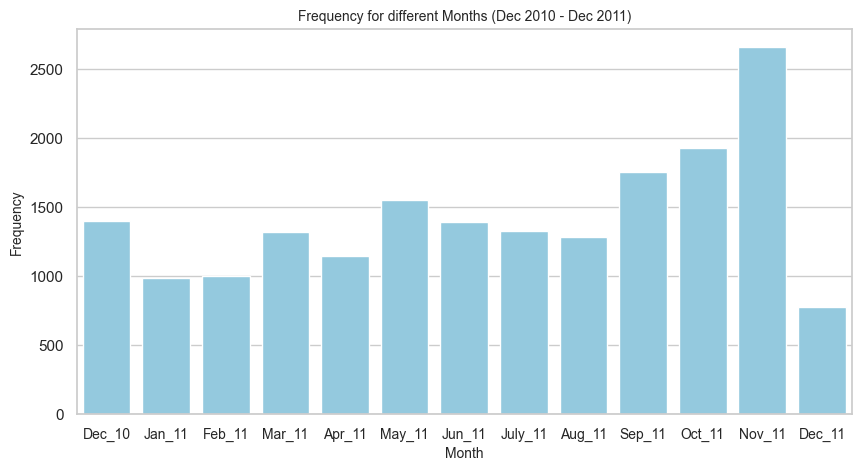

In [119]:
# Ploting the above data
plt.figure(figsize=(10,5))
ax = sns.barplot(data=orders_by_year_month, x='year_month', y='count', color='skyblue')
ax.set_xlabel('Month',fontsize=10)
ax.set_ylabel('Frequency',fontsize=10)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=10)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11', 'Dec_11'), rotation='horizontal', fontsize=10)
plt.show()

### Analysis per Country

In [120]:
import pandas as pd

data_sin_duplicados = df2.drop_duplicates(subset=['InvoiceNo'])

In [121]:
orders_by_country = data_sin_duplicados.groupby('Country')['InvoiceNo'].count().to_frame().reset_index().sort_values("InvoiceNo", ascending=False)
orders_by_country

,Country,InvoiceNo
35,United Kingdom,16649
14,Germany,457
13,France,389
10,EIRE,260
3,Belgium,98
23,Netherlands,95
30,Spain,90
0,Australia,57
26,Portugal,57
32,Switzerland,51


Text(0.5, 0, 'Orders')

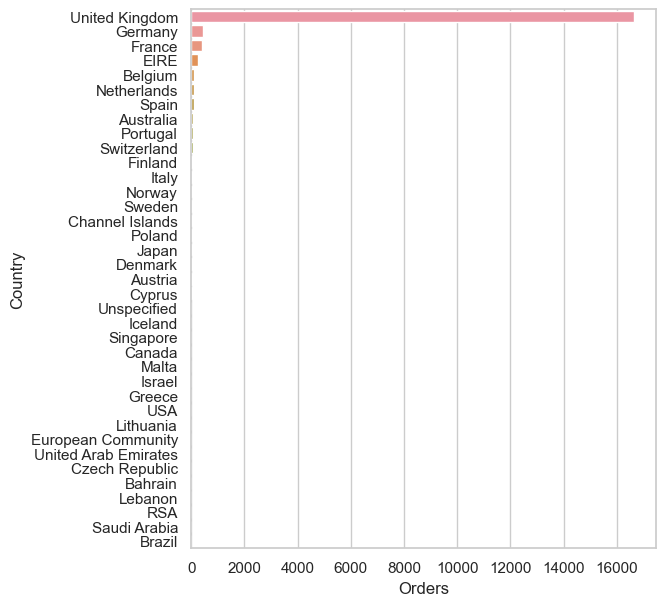

In [122]:
plt.figure(figsize=(6,7))
ax = sns.barplot(data=orders_by_country, y="Country", x="InvoiceNo", order=orders_by_country["Country"])
ax.set_xlabel("Orders")

In [123]:
orders_by_country_without_UK = orders_by_country.drop(index=[35])
orders_by_country_without_UK

,Country,InvoiceNo
14,Germany,457
13,France,389
10,EIRE,260
3,Belgium,98
23,Netherlands,95
30,Spain,90
0,Australia,57
26,Portugal,57
32,Switzerland,51
12,Finland,41


Text(0.5, 0, 'Orders')

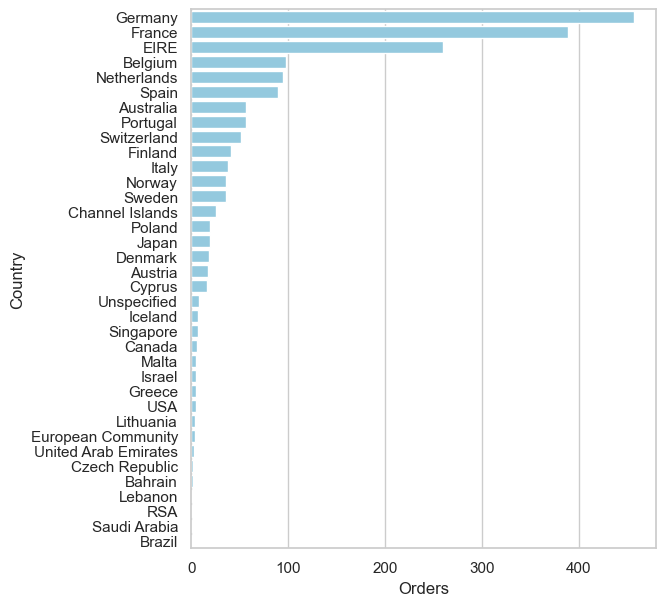

In [124]:
plt.figure(figsize=(6,7))
ax = sns.barplot(data=orders_by_country_without_UK, y="Country", x="InvoiceNo", order=orders_by_country_without_UK["Country"], color="skyblue")
ax.set_xlabel("Orders")

## Repeat Customers

In [125]:
# Get our date range for our data
print('Date Range: %s to %s' % (df2['InvoiceDate'].min(), df2['InvoiceDate'].max()))

# Since Our data ends at Nov-30 2011, we're taking all of the transactions that occurred before December 01, 2011 
df2 = df2.loc[df2['InvoiceDate'] < '2011-12-01']

Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [126]:
# Get total amount spent per invoice and associate it with CustomerID and Country
invoice_customer_df = df2.groupby(by=['InvoiceNo', 'year_month']).agg({'AmountSpent': sum, 'CustomerID': max,'Country': max,}).reset_index()
invoice_customer_df.head()

,InvoiceNo,year_month,AmountSpent,CustomerID,Country
0,536365,201012,139.12,17850,United Kingdom
1,536366,201012,22.20,17850,United Kingdom
2,536367,201012,278.73,13047,United Kingdom
3,536368,201012,70.05,13047,United Kingdom
4,536369,201012,17.85,13047,United Kingdom


In [127]:
orders_by_year_month_customer = invoice_customer_df.groupby(['year_month', 'CustomerID']).agg(orders = ("CustomerID", "count")).reset_index().query("orders > 1")
orders_by_year_month_customer

,year_month,CustomerID,orders
2,201012,12370,2
6,201012,12395,2
11,201012,12431,2
12,201012,12433,2
14,201012,12471,4
...,...,...,...
12423,201111,18210,3
12428,201111,18225,2
12429,201111,18229,3
12430,201111,18230,2


In [128]:
monthly_repeat_customers_df = orders_by_year_month_customer.groupby("year_month")["CustomerID"].count()
monthly_repeat_customers_df

year_month
201012    263
201101    149
201102    150
201103    201
201104    168
201105    279
201106    219
201107    227
201108    196
201109    271
201110    323
201111    540
Name: CustomerID, dtype: int64

In [129]:
# Number of Unique customers per month
monthly_total_customers_df = invoice_customer_df.groupby("year_month")["CustomerID"].nunique()
monthly_total_customers_df

year_month
201012     885
201101     741
201102     758
201103     974
201104     856
201105    1056
201106     991
201107     949
201108     935
201109    1266
201110    1364
201111    1665
Name: CustomerID, dtype: int64

In [130]:
# Ratio of Repeat to Unique customers
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_total_customers_df*100.0
monthly_repeat_percentage

year_month
201012    29.717514
201101    20.107962
201102    19.788918
201103    20.636550
201104    19.626168
201105    26.420455
201106    22.098890
201107    23.919916
201108    20.962567
201109    21.406003
201110    23.680352
201111    32.432432
Name: CustomerID, dtype: float64

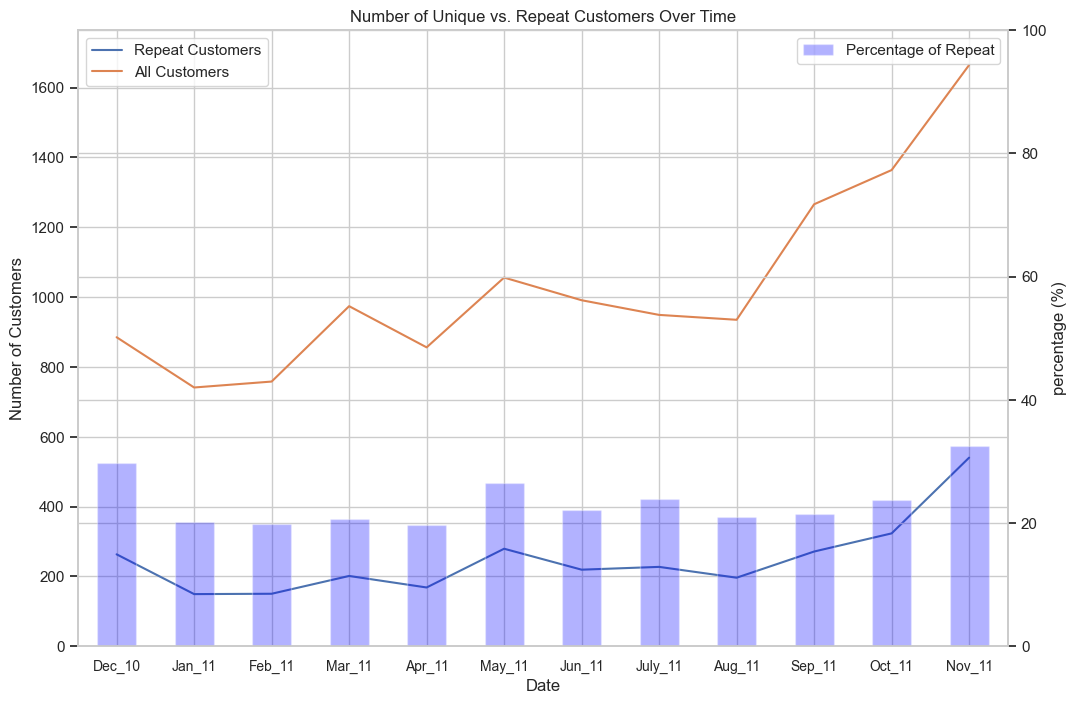

In [131]:
# Plotting this visually
# Note we're using a 2 scale y axis (left and right)

ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(figsize=(12,8))

pd.DataFrame(monthly_total_customers_df.values).plot(ax=ax,grid=True)

ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(ax=ax,grid=True,secondary_y=True,color='blue',alpha=0.3)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Unique vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_total_customers_df.values.max()+100])
ax2.set_ylim([0, 100])
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=10)
plt.show()

plt.show()

# Item Trends

Let's count the number of items sold for each product for each period.

In [132]:
# Now let's get quantity of each item sold per month
date_item_df = df2.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum().to_frame().reset_index()

date_item_df.head(15)

,InvoiceDate,StockCode,Quantity
0,2010-12-31,10002,224
1,2010-12-31,10120,16
2,2010-12-31,10123C,1
3,2010-12-31,10124A,4
4,2010-12-31,10124G,5
5,2010-12-31,10125,143
6,2010-12-31,10133,123
7,2010-12-31,10135,366
8,2010-12-31,11001,65
9,2010-12-31,15034,38


In [133]:
date_item_df.groupby('StockCode')["Quantity"].sum().to_frame().sort_values("Quantity", ascending=False)

,Quantity
StockCode,
23166,77729
84077,53052
85099B,45126
22197,43821
85123A,35980
...,...
85170A,1
90024D,1
84569C,1


In [134]:
# Let's look at the top 5 items sale 

date_item_df = df.loc[df['StockCode'].isin(['23166', '84077', '85099B', '22197', '85123A'])].set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum().to_frame().reset_index(1)

date_item_df.index = date_item_df.index.strftime('%m-%Y')
date_item_df

,StockCode,Quantity
InvoiceDate,,
12-2010,22197,2731
12-2010,84077,5195
12-2010,85099B,2126
12-2010,85123A,3225
01-2011,22197,1809
...,...,...
12-2011,22197,6198
12-2011,23166,207
12-2011,84077,1367


<Axes: ylabel='Quantity'>

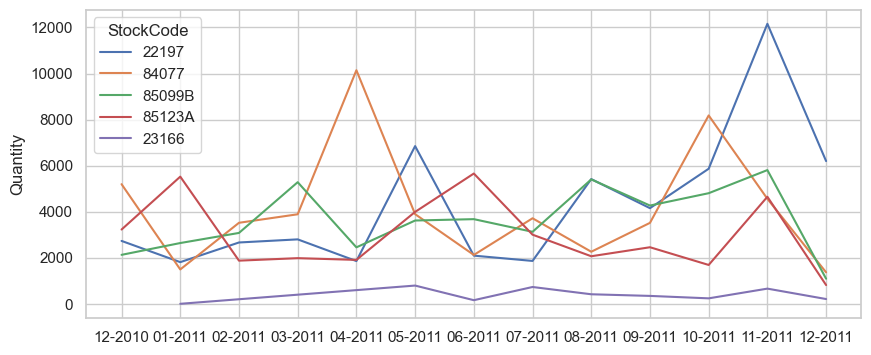

In [135]:
plt.figure(figsize=(10,4))
sns.lineplot(data=date_item_df, x=date_item_df.index.values,y='Quantity', hue='StockCode')